In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

appleData = pd.read_csv('apple_quality.csv') #predict if apple has good or bad quality
appleData = appleData.iloc[:1000] 
data = appleData.iloc[:, 1:appleData.shape[1]-1]
labels = appleData['Quality'].replace({'good': 1, 'bad': 0}) #encode labels

xtrain, xtest, ytrain, ytest = train_test_split(data, labels, test_size=0.2, random_state=42)

In [2]:
xtrain_norm = (xtrain - np.mean(xtrain, axis=0)) / np.std(xtrain, axis=0)
xtest_norm = (xtest - np.mean(xtrain, axis=0)) / np.std(xtrain, axis=0)

cov_matrix = np.cov(xtrain_norm, rowvar=False)

#eigenvectors represent directions of maximum variance in the data, eigenvalues represent magnitude of variance
eigenvals, eigenvecs = np.linalg.eig(cov_matrix)

sorted = np.argsort(eigenvals)[::-1] 
eigenvals = eigenvals[sorted]
eigenvecs = eigenvecs[:, sorted]

choose = 6
eigenvals = eigenvals[:choose]
eigenvecs = eigenvecs[:, :choose]

#transform into pca space
xtrain_pca = np.dot(xtrain_norm, eigenvecs)
xtest_pca = np.dot(xtest_norm, eigenvecs)

print(eigenvals)

[1.51499222 1.44143919 1.28962722 1.11964844 0.68753607 0.62736551]


In [3]:
scaler = StandardScaler()
scaler.fit(xtrain)

xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)

pca = PCA(n_components=6)
pca.fit(xtrain_scaled)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
xtrain_pca = pca.transform(xtrain_scaled)
xtest_pca = pca.transform(xtest_scaled)

[1.51499222 1.44143919 1.28962722 1.11964844 0.68753607 0.62736551]
[0.21615693 0.20566248 0.18400217 0.15974984 0.09809666 0.08951161]


In [4]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain_pca, ytrain)
pred = model.predict(xtest_pca)
acc = accuracy_score(pred, ytest)
print("accuracy:", acc)

accuracy: 0.68


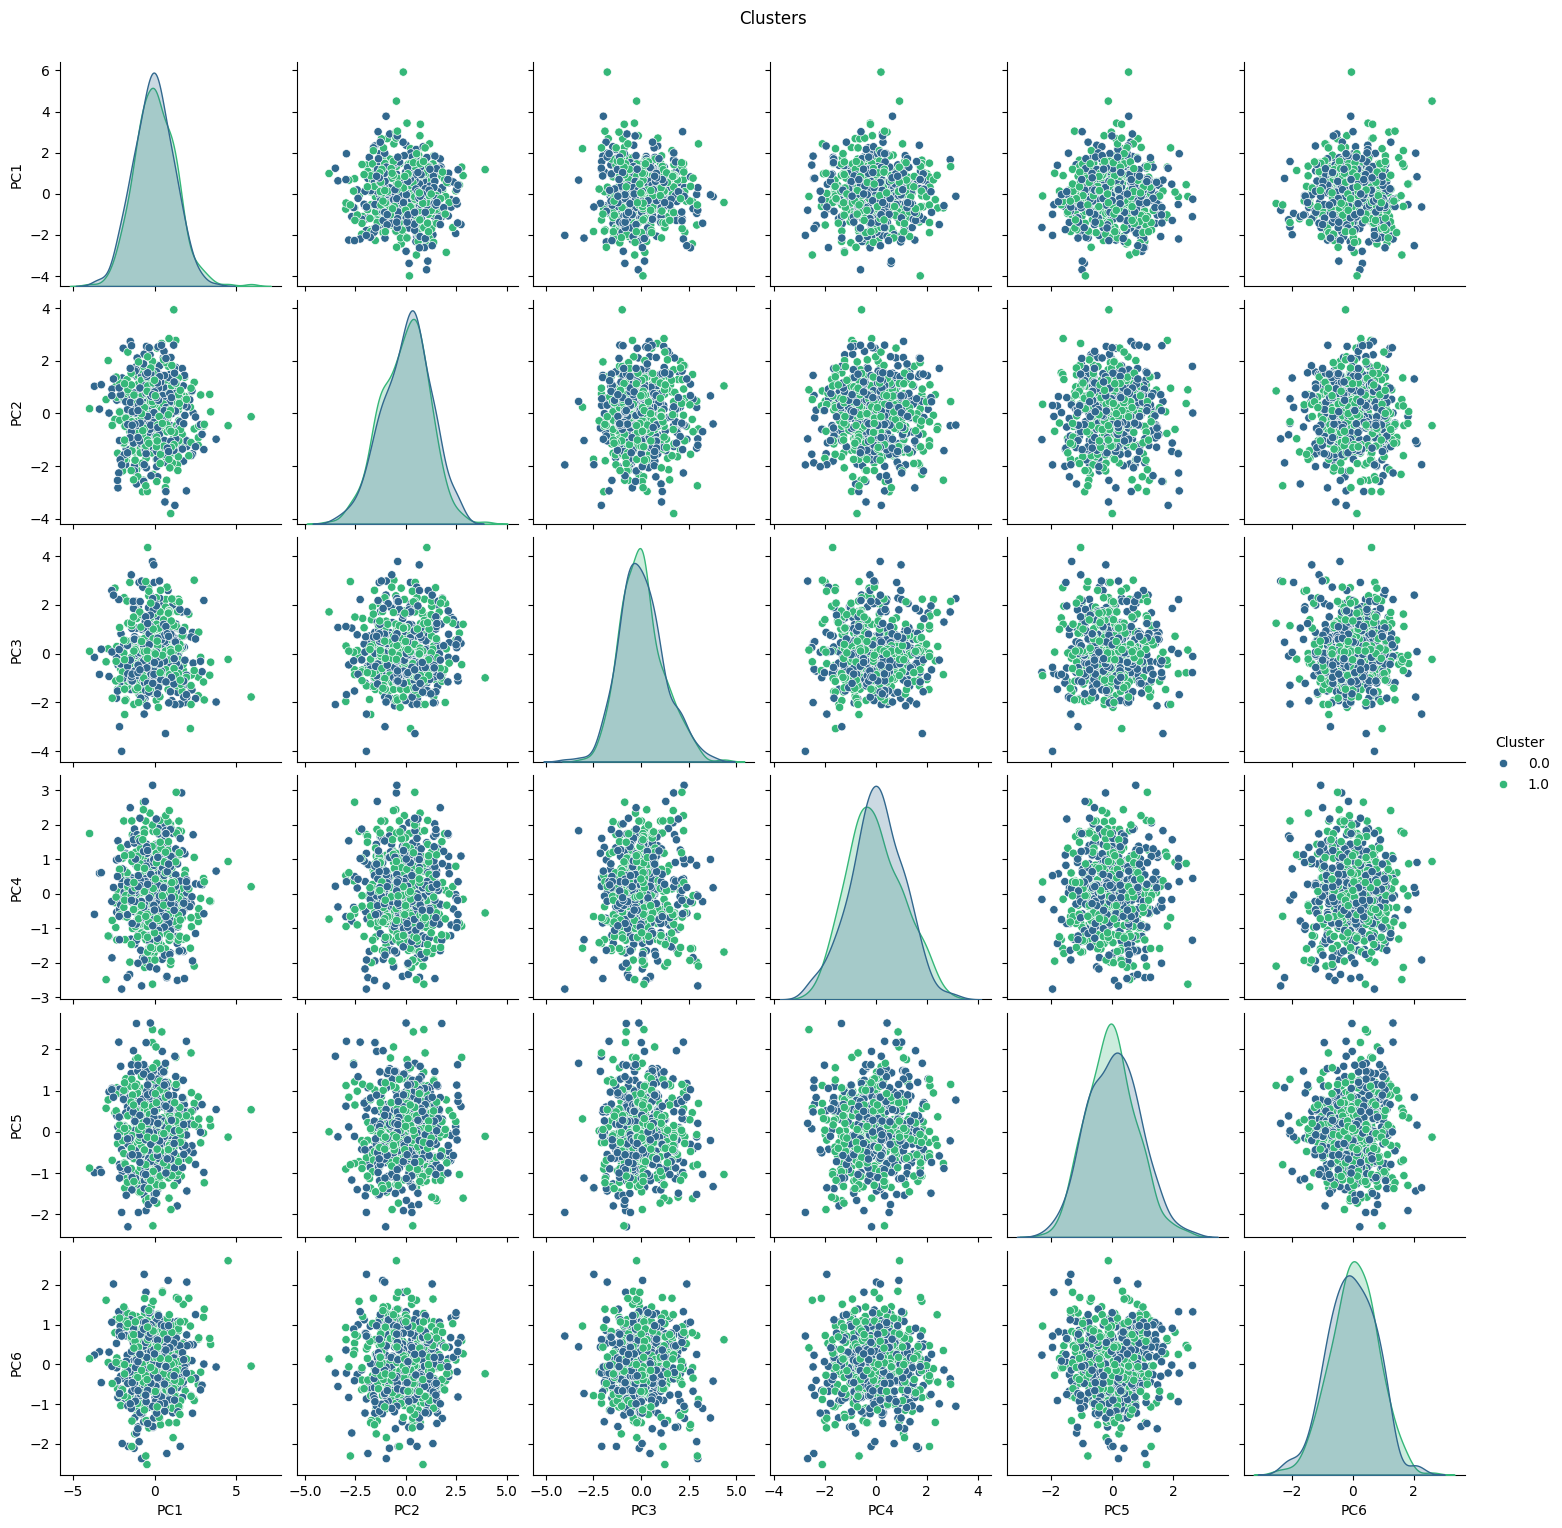

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

xtrain_pca_df = pd.DataFrame(xtrain_pca, columns=[f"PC{i+1}" for i in range(xtrain_pca.shape[1])])

xtrain_pca_df['Cluster'] = ytrain

sns.pairplot(xtrain_pca_df, hue='Cluster', palette='viridis')
plt.suptitle('Clusters', y=1.02)
plt.show()
